# Retail Data Analysis Notebook
## Comprehensive Data Exploration, Quality Checks, and Cleaning

This notebook will help you explore, clean, and prepare your retail data for analysis and BI.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Data Loading

In [2]:
# Load all data files
categories = pd.read_csv('sourcedata/Categories.csv')
customers = pd.read_csv('sourcedata/Customers.csv')
products = pd.read_csv('sourcedata/Products.csv')
sales = pd.read_csv('sourcedata/SalesTransactions.csv')

print("Data files loaded successfully!")
print(f"Categories: {categories.shape}")
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Sales: {sales.shape}")

Data files loaded successfully!
Categories: (8, 2)
Customers: (1000, 9)
Products: (200, 7)
Sales: (87440, 9)


## 3. Data Quality Assessment

In [3]:
def data_quality_report(df, df_name):
    print(f"\n{'='*50}")
    print(f"DATA QUALITY REPORT: {df_name}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"\nData Types:")
    print(df.dtypes)
    
    # Missing values
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
    print(missing_df[missing_df['Missing Count'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicates}")
    
    # Unique values
    print(f"\nUnique Values per Column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"  {col}: {unique_count} unique values")

# Generate reports for all datasets
for name, df in [('Categories', categories), ('Customers', customers), 
                 ('Products', products), ('Sales', sales)]:
    data_quality_report(df, name)


DATA QUALITY REPORT: Categories
Shape: (8, 2)

Data Types:
CategoryID       int64
CategoryName    object
dtype: object

Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Duplicate Rows: 0

Unique Values per Column:
  CategoryID: 8 unique values
  CategoryName: 8 unique values

DATA QUALITY REPORT: Customers
Shape: (1000, 9)

Data Types:
CustomerID      int64
FirstName      object
LastName       object
Email          object
Phone          object
City           object
State          object
Country        object
CreatedDate    object
dtype: object

Missing Values:
       Missing Count  Missing %
Phone             60        6.0

Duplicate Rows: 0

Unique Values per Column:
  CustomerID: 1000 unique values
  FirstName: 340 unique values
  LastName: 480 unique values
  Email: 998 unique values
  Phone: 940 unique values
  City: 964 unique values
  State: 50 unique values
  Country: 1 unique values
  CreatedDate: 529 unique values

DATA QUALITY REPORT: Products
S

## 4. Data Exploration & Statistical Summary

In [4]:
# Statistical summary for numerical columns
print("SALES DATA - Statistical Summary:")
print(sales.describe())

print("\nPRODUCTS DATA - Statistical Summary:")
print(products.describe())

print("\nCUSTOMERS DATA - Summary:")
print(customers.describe(include='object'))

SALES DATA - Statistical Summary:
       TransactionID    CustomerID     ProductID      Quantity     UnitPrice  \
count   87440.000000  85679.000000  87440.000000  87440.000000  87440.000000   
mean    44720.500000    501.316402    200.889067      2.961837    222.700317   
std     25241.898106    288.518326     57.812478      1.467480    370.738356   
min      1001.000000      1.000000    101.000000     -1.000000      3.520000   
25%     22860.750000    252.500000    151.000000      2.000000     40.800000   
50%     44720.500000    501.000000    201.000000      3.000000     90.750000   
75%     66580.250000    752.000000    251.000000      4.000000    205.280000   
max     88440.000000   1000.000000    300.000000      5.000000   2812.030000   

           Discount       StoreID  
count  87440.000000  87440.000000  
mean      26.673638      5.505787  
std       61.404382      2.871607  
min        0.000000      1.000000  
25%        0.930000      3.000000  
50%        6.920000      6.00

In [5]:
# Explore date ranges
if 'TransactionDate' in sales.columns:
    sales['TransactionDate'] = pd.to_datetime(sales['TransactionDate'])
    print("Sales Date Range:")
    print(f"Start: {sales['TransactionDate'].min()}")
    print(f"End: {sales['TransactionDate'].max()}")
    print(f"Duration: {sales['TransactionDate'].max() - sales['TransactionDate'].min()}")

if 'CreatedDate' in customers.columns:
    customers['CreatedDate'] = pd.to_datetime(customers['CreatedDate'])
    print("\nCustomer Creation Date Range:")
    print(f"Start: {customers['CreatedDate'].min()}")
    print(f"End: {customers['CreatedDate'].max()}")

Sales Date Range:
Start: 2024-01-01 00:00:00
End: 2024-12-31 00:00:00
Duration: 365 days 00:00:00

Customer Creation Date Range:
Start: 2023-11-12 00:00:00
End: 2025-11-11 00:00:00


## 5. Data Visualization

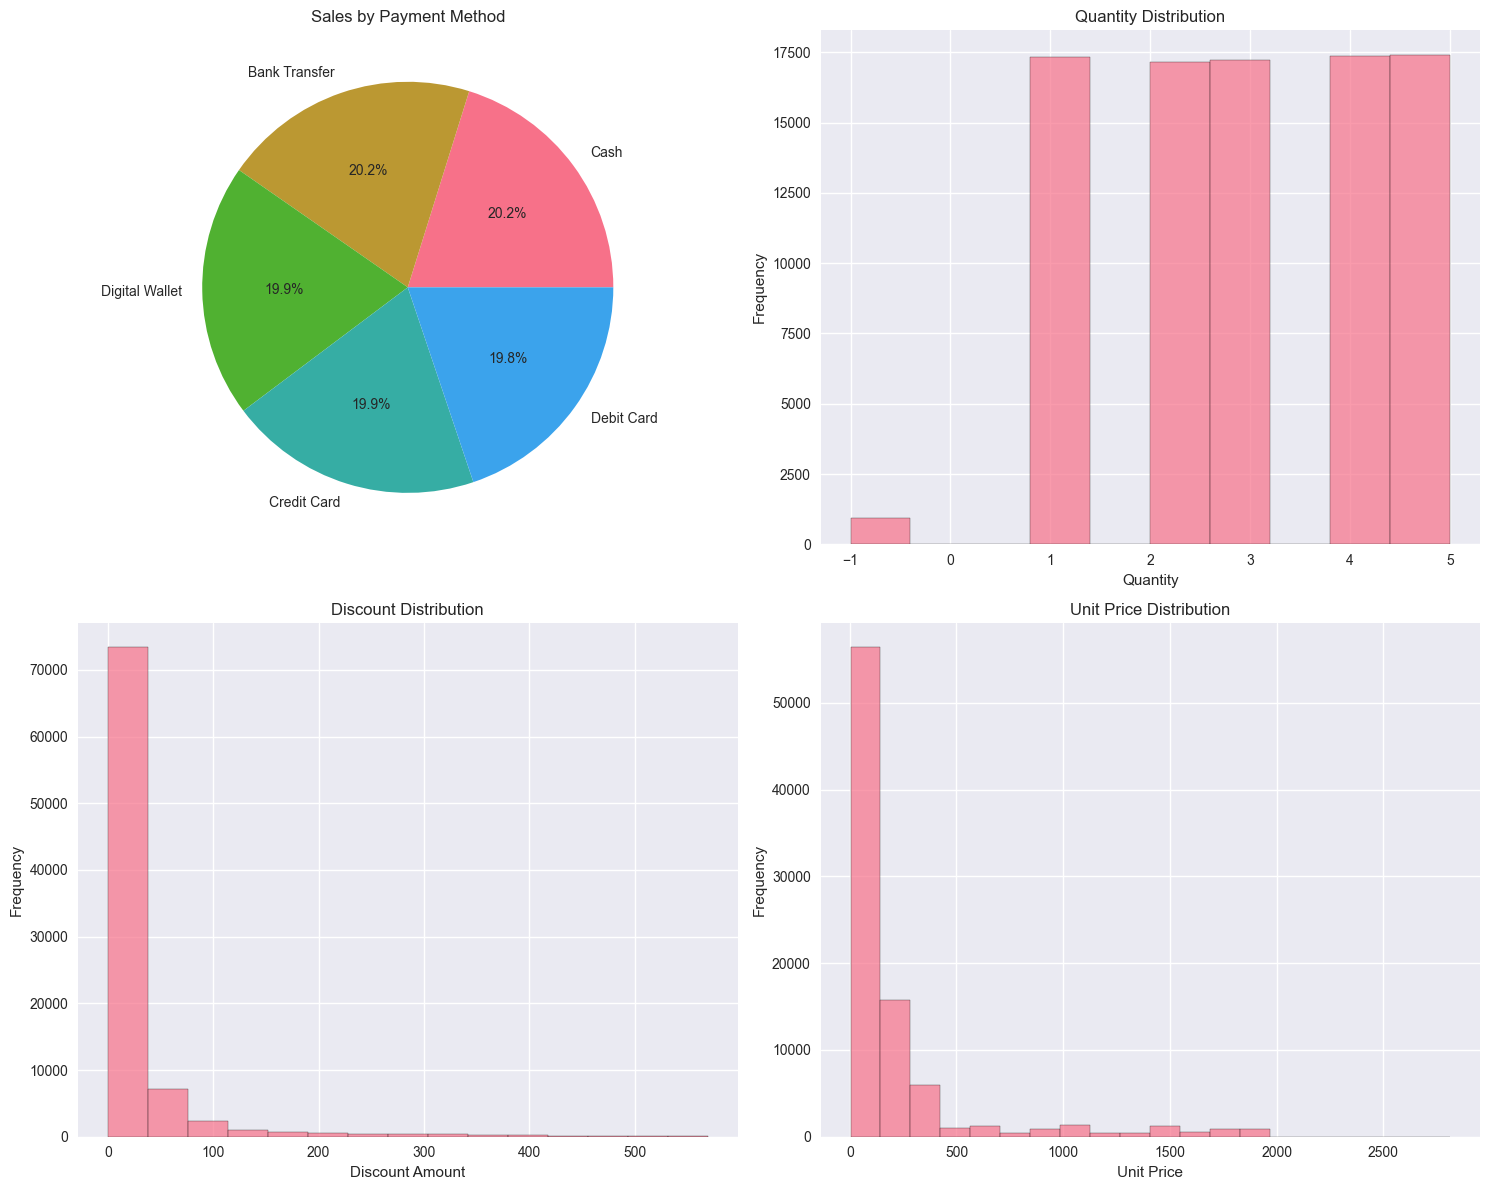

In [6]:
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sales by Payment Method
payment_counts = sales['PaymentMethod'].value_counts()
axes[0,0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Sales by Payment Method')

# 2. Quantity Distribution
axes[0,1].hist(sales['Quantity'], bins=10, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Quantity Distribution')
axes[0,1].set_xlabel('Quantity')
axes[0,1].set_ylabel('Frequency')

# 3. Discount Distribution
axes[1,0].hist(sales['Discount'], bins=15, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Discount Distribution')
axes[1,0].set_xlabel('Discount Amount')
axes[1,0].set_ylabel('Frequency')

# 4. Unit Price Distribution
axes[1,1].hist(sales['UnitPrice'], bins=20, edgecolor='black', alpha=0.7)
axes[1,1].set_title('Unit Price Distribution')
axes[1,1].set_xlabel('Unit Price')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

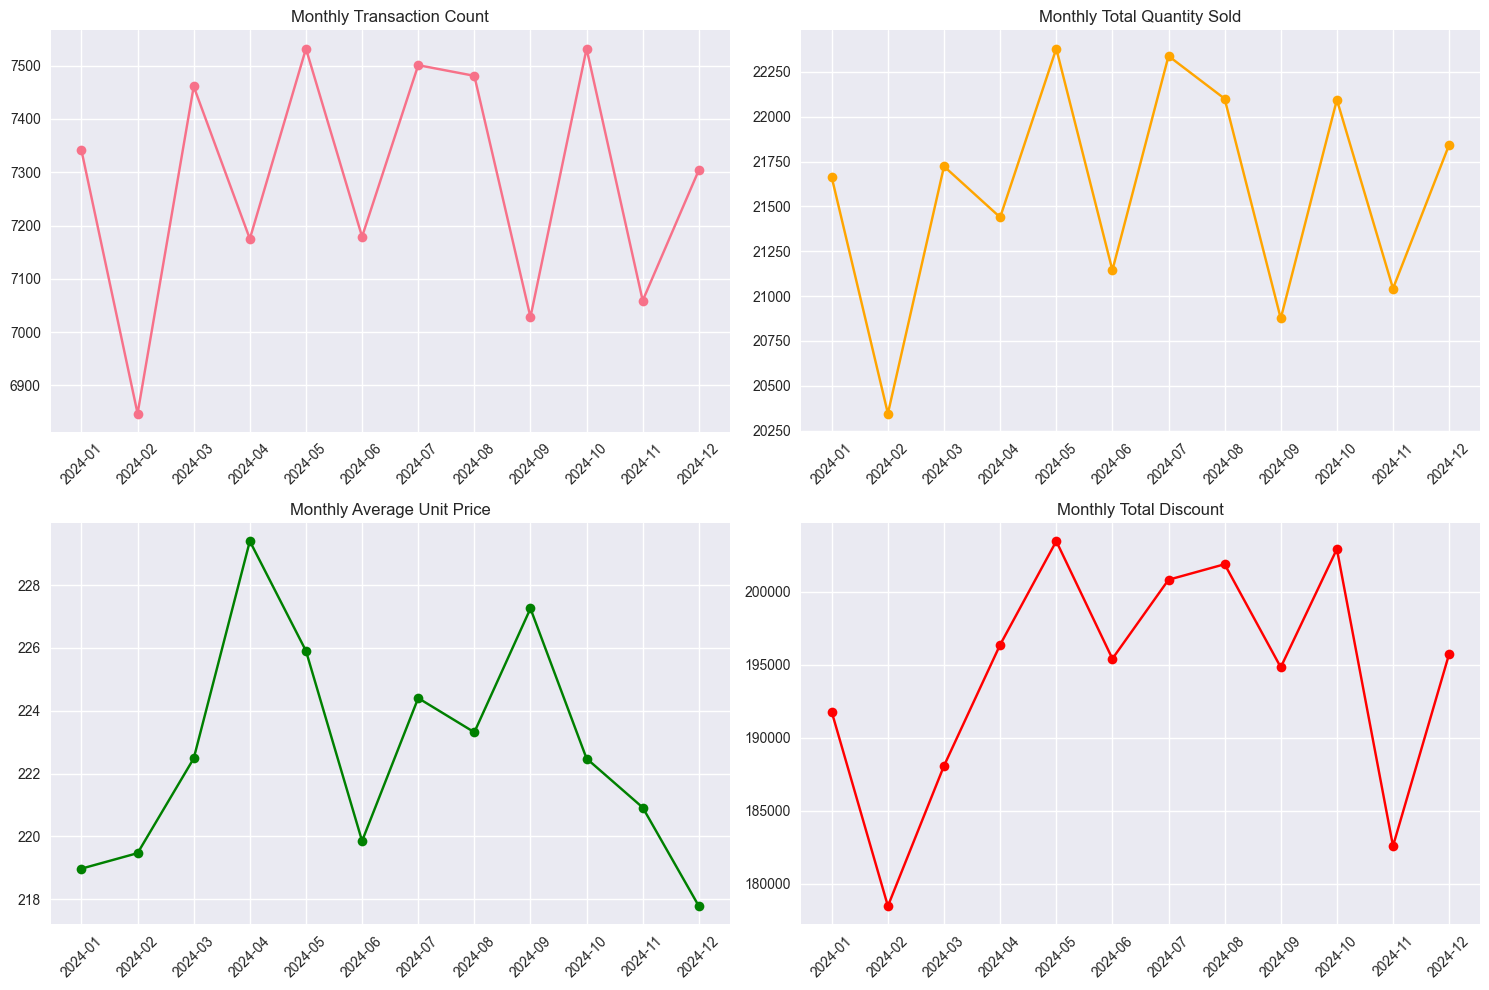

In [7]:
# Sales trend over time
if 'TransactionDate' in sales.columns:
    sales['Month'] = sales['TransactionDate'].dt.to_period('M')
    monthly_sales = sales.groupby('Month').agg({
        'TransactionID': 'count',
        'Quantity': 'sum',
        'UnitPrice': 'mean',
        'Discount': 'sum'
    }).reset_index()
    monthly_sales['Month'] = monthly_sales['Month'].astype(str)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Transaction count
    axes[0,0].plot(monthly_sales['Month'], monthly_sales['TransactionID'], marker='o')
    axes[0,0].set_title('Monthly Transaction Count')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Total quantity
    axes[0,1].plot(monthly_sales['Month'], monthly_sales['Quantity'], marker='o', color='orange')
    axes[0,1].set_title('Monthly Total Quantity Sold')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Average unit price
    axes[1,0].plot(monthly_sales['Month'], monthly_sales['UnitPrice'], marker='o', color='green')
    axes[1,0].set_title('Monthly Average Unit Price')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Total discount
    axes[1,1].plot(monthly_sales['Month'], monthly_sales['Discount'], marker='o', color='red')
    axes[1,1].set_title('Monthly Total Discount')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 6. Data Cleaning & Transformation

In [8]:
# Create cleaned datasets
sales_clean = sales.copy()
customers_clean = customers.copy()
products_clean = products.copy()

# Handle missing values
print("Handling missing values...")
for df, df_name in [(sales_clean, 'Sales'), (customers_clean, 'Customers'), (products_clean, 'Products')]:
    missing_before = df.isnull().sum().sum()
    
    # Fill numerical columns with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    
    # Fill categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown')
    
    missing_after = df.isnull().sum().sum()
    print(f"{df_name}: Fixed {missing_before - missing_after} missing values")

Handling missing values...
Sales: Fixed 1761 missing values
Customers: Fixed 60 missing values
Products: Fixed 0 missing values


In [9]:
# Remove duplicates
print("\nRemoving duplicates...")
for df, df_name in [(sales_clean, 'Sales'), (customers_clean, 'Customers'), (products_clean, 'Products')]:
    duplicates_before = df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    duplicates_after = df.duplicated().sum()
    print(f"{df_name}: Removed {duplicates_before - duplicates_after} duplicate rows")


Removing duplicates...
Sales: Removed 0 duplicate rows
Customers: Removed 0 duplicate rows
Products: Removed 0 duplicate rows


In [10]:
# Data type conversions and feature engineering
print("\nFeature engineering...")

# Convert dates
if 'TransactionDate' in sales_clean.columns:
    sales_clean['TransactionDate'] = pd.to_datetime(sales_clean['TransactionDate'])
    sales_clean['TransactionMonth'] = sales_clean['TransactionDate'].dt.to_period('M')
    sales_clean['TransactionDay'] = sales_clean['TransactionDate'].dt.day_name()

if 'CreatedDate' in customers_clean.columns:
    customers_clean['CreatedDate'] = pd.to_datetime(customers_clean['CreatedDate'])

# Calculate derived metrics
sales_clean['TotalAmount'] = sales_clean['Quantity'] * sales_clean['UnitPrice'] - sales_clean['Discount']
sales_clean['NetAmount'] = sales_clean['Quantity'] * sales_clean['UnitPrice']

products_clean['ProfitMargin'] = (products_clean['SellingPrice'] - products_clean['CostPrice']) / products_clean['SellingPrice'] * 100

print("Feature engineering completed!")


Feature engineering...
Feature engineering completed!


## 7. Data Validation & Integrity Checks

In [11]:
print("DATA VALIDATION CHECKS:")
print("="*50)

# Check for negative values where they shouldn't exist
negative_checks = {
    'Quantity': (sales_clean['Quantity'] < 0).sum(),
    'UnitPrice': (sales_clean['UnitPrice'] < 0).sum(),
    'Discount': (sales_clean['Discount'] < 0).sum(),
    'CostPrice': (products_clean['CostPrice'] < 0).sum(),
    'SellingPrice': (products_clean['SellingPrice'] < 0).sum()
}

for col, count in negative_checks.items():
    if count > 0:
        print(f"⚠️  WARNING: {count} negative values found in {col}")
    else:
        print(f"✓ OK: No negative values in {col}")

# Check for data consistency
print("\nDATA CONSISTENCY CHECKS:")
print("="*50)

# Check if SellingPrice >= CostPrice
price_issue = (products_clean['SellingPrice'] < products_clean['CostPrice']).sum()
print(f"Products with SellingPrice < CostPrice: {price_issue}")

# Check for valid customer IDs in sales
invalid_customers = ~sales_clean['CustomerID'].isin(customers_clean['CustomerID'])
print(f"Sales with invalid CustomerID: {invalid_customers.sum()}")

# Check for valid product IDs in sales
invalid_products = ~sales_clean['ProductID'].isin(products_clean['ProductID'])
print(f"Sales with invalid ProductID: {invalid_products.sum()}")

DATA VALIDATION CHECKS:
⚠️  WARNING: 934 negative values found in Quantity
✓ OK: No negative values in UnitPrice
✓ OK: No negative values in Discount
✓ OK: No negative values in CostPrice
✓ OK: No negative values in SellingPrice

DATA CONSISTENCY CHECKS:
Products with SellingPrice < CostPrice: 0
Sales with invalid CustomerID: 0
Sales with invalid ProductID: 0


## 8. Save Cleaned Data

In [14]:
import os

# Create folder 'cleaneddata' if it doesn't exist
os.makedirs('cleaneddata', exist_ok=True)

# Save cleaned datasets
sales_clean.to_csv('cleaneddata/SalesTransactions_Cleaned.csv', index=False)
customers_clean.to_csv('cleaneddata/Customers_Cleaned.csv', index=False)
products_clean.to_csv('cleaneddata/Products_Cleaned.csv', index=False)

print("Cleaned datasets saved:")
print("✓ SalesTransactions_Cleaned.csv")
print("✓ Customers_Cleaned.csv")
print("✓ Products_Cleaned.csv")

print("\nFinal dataset sizes:")
print(f"Sales: {sales_clean.shape}")
print(f"Customers: {customers_clean.shape}")
print(f"Products: {products_clean.shape}")

Cleaned datasets saved:
✓ SalesTransactions_Cleaned.csv
✓ Customers_Cleaned.csv
✓ Products_Cleaned.csv

Final dataset sizes:
Sales: (87440, 14)
Customers: (1000, 9)
Products: (200, 8)


## 9. Summary Report

In [15]:
print("="*60)
print("DATA PREPARATION SUMMARY REPORT")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Sales Transactions: {len(sales_clean):,}")
print(f"   • Total Customers: {len(customers_clean):,}")
print(f"   • Total Products: {len(products_clean):,}")
print(f"   • Total Categories: {len(categories):,}")

print(f"\n💰 FINANCIAL METRICS:")
print(f"   • Total Sales Amount: ${sales_clean['TotalAmount'].sum():,.2f}")
print(f"   • Total Discount Given: ${sales_clean['Discount'].sum():,.2f}")
print(f"   • Average Transaction Value: ${sales_clean['TotalAmount'].mean():.2f}")
print(f"   • Average Profit Margin: {products_clean['ProfitMargin'].mean():.1f}%")

print(f"\n📅 TEMPORAL ANALYSIS:")
if 'TransactionDate' in sales_clean.columns:
    date_range = sales_clean['TransactionDate'].max() - sales_clean['TransactionDate'].min()
    print(f"   • Data Period: {date_range.days} days")
    print(f"   • From: {sales_clean['TransactionDate'].min().strftime('%Y-%m-%d')}")
    print(f"   • To: {sales_clean['TransactionDate'].max().strftime('%Y-%m-%d')}")

print(f"\n✅ DATA QUALITY STATUS:")
print(f"   • Missing Values: Resolved")
print(f"   • Duplicates: Removed") 
print(f"   • Data Types: Standardized")
print(f"   • Derived Features: Created")

print(f"\n🎯 READY FOR ANALYSIS & BI!")
print("="*60)

DATA PREPARATION SUMMARY REPORT

📊 DATASET OVERVIEW:
   • Total Sales Transactions: 87,440
   • Total Customers: 1,000
   • Total Products: 200
   • Total Categories: 8

💰 FINANCIAL METRICS:
   • Total Sales Amount: $55,253,140.27
   • Total Discount Given: $2,332,342.95
   • Average Transaction Value: $631.90
   • Average Profit Margin: 34.2%

📅 TEMPORAL ANALYSIS:
   • Data Period: 365 days
   • From: 2024-01-01
   • To: 2024-12-31

✅ DATA QUALITY STATUS:
   • Missing Values: Resolved
   • Duplicates: Removed
   • Data Types: Standardized
   • Derived Features: Created

🎯 READY FOR ANALYSIS & BI!
